# Objective : To prepare wordcloud for positive and negative reviews for different price range

The objective of this document is to create the word cloud  for positive and negative keywords.
We are going through following steps:

1. Read the data from the file
2. There are 8 different files from which we are reading data, for positive review for all price range from 1-4 and negative reviews for price range 1-4
3.Identify the non english reviews and remove the corresponding reviews as we can work only with English reviews
4. Next we have cleared any special characters and number from the review text
5. changed the casing of the text to lower case to ensure that we get same format for lemmatised text
6. We have used WordNetLemmatizer to lemmatise the words in its basic format
7. We have used english stopwords from nltk.corpus library to remove the stopwords fro review text
8. We have taken the cleaned text from above and created word cloud

To create word cloud, 

1. We have taken data for same price range for high rated reviews for high rated restaurant and low rated review from low rated restaurant.
2. Joined the all review text of each datasets individually
3. Identified the common words between these two dataframes
4. Identified the unique words for low rated reviews for low rated restaurants by filtering the common words
5. Identified the unique words for High rated reviews for high rated restaurant by filtering the common words
6. Taken only high frequency words from the bag of words we got in the step 3 and 4.
7. Created 2 distinct word clouds for each price range for low rated restaurant with low rated reviews and high rated restaurant with high rated reviews


### Importing libraries


In [1]:
import pandas as pd
import numpy as np

#To detect the languages
from langdetect import detect

#for distributed task, to make the processing faster
import dask.dataframe as dd
from dask.multiprocessing import get

#importing regular expressions to handle the text data
import re

#get the English stopwords
from nltk.corpus import stopwords



from wordcloud import WordCloud, STOPWORDS

#To identify lemmatised text
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

import nltk
from nltk import word_tokenize
from nltk.corpus import words

#The graphical libraries
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

%matplotlib inline

### Reading data

In [2]:
reviewsP1_R_High = pd.read_csv("Bigrams/data/Price1_highrated_review_final.csv", sep="\t")
reviewsP2_R_High = pd.read_csv("Bigrams/data/Price2_highrated_review_final.csv", sep="\t")
reviewsP3_R_High = pd.read_csv("Bigrams/data/Price3_highrated_review_final.csv", sep="\t")
reviewsP4_R_High = pd.read_csv("Bigrams/data/Price4_highrated_review_final.csv", sep="\t")
reviewsP1_R_Low = pd.read_csv("Bigrams/data/Price1_lowrated_review_final.csv", sep="\t")
reviewsP2_R_Low = pd.read_csv("Bigrams/data/Price2_lowrated_review_final.csv", sep="\t")
reviewsP3_R_Low = pd.read_csv("Bigrams/data/Price3_lowrated_review_final.csv", sep="\t")
reviewsP4_R_Low = pd.read_csv("Bigrams/data/Price4_lowrated_review_final.csv", sep="\t")     

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Validating data in each of the dataframes for first 2 records

In [3]:
reviewsP1_R_High.shape

(79725, 7)

In [4]:
reviewsP1_R_High.head(5)

,Unnamed: 0,Business_id,Cool,Funny,Review_Ratings,Text,Useful
0,0,UdEmYOnk2iJDY9lpEPAlJQ,2.0,0.0,4.0,"Solid, cheap, delicious Italian. Good calzone...",2.0
1,1,UdEmYOnk2iJDY9lpEPAlJQ,2.0,0.0,5.0,We come here a lot. My kids love their pizza a...,2.0
2,2,UdEmYOnk2iJDY9lpEPAlJQ,1.0,0.0,5.0,I've been coming here since I was 14 years old...,0.0
3,3,UdEmYOnk2iJDY9lpEPAlJQ,1.0,0.0,5.0,My wife and I have been a couple times now and...,1.0
4,4,UdEmYOnk2iJDY9lpEPAlJQ,0.0,0.0,5.0,I recently had my sister's babyshower in their...,0.0


In [5]:
reviewsP2_R_High.head(2)

,Unnamed: 0,Business_id,Cool,Funny,Review_Ratings,Text,Useful
0,0,ecJri9ozyke4dOCWulZiRQ,0.0,0.0,5.0,OMG! THIS PLACE IS AMAZING!!!!! Daughter and I...,0.0
1,1,ecJri9ozyke4dOCWulZiRQ,0.0,0.0,5.0,We've only ever ordered their ramen for pickup...,0.0


In [6]:
reviewsP3_R_High.head(2)

,Unnamed: 0,Business_id,Cool,Funny,Review_Ratings,Text,Useful
0,0,nkHaix6KenApS8M-liZsCQ,0,0,5,Classy French/American restaurant with the che...,1
1,1,nkHaix6KenApS8M-liZsCQ,1,0,5,highly recommended!! the food was spot on. Ord...,0


In [7]:
reviewsP4_R_High.head(2)

,Unnamed: 0,Business_id,Cool,Funny,Review_Ratings,Text,Useful
0,0,_4Gpn_NIM94D9OFucgfaJQ,0,0,4,"Great food, great atmosphere a bit crowded but...",0
1,1,_4Gpn_NIM94D9OFucgfaJQ,0,0,5,Been coming here since they opened. Unfortunat...,1


In [8]:
reviewsP1_R_Low.head(2)

,Unnamed: 0,Business_id,Cool,Funny,Review_Ratings,Text,Useful
0,0,llcByEqkvO-KHT6oJ3pJMA,0.0,1.0,1.0,Not 24 hours on Friday. Sat at their lit up dr...,0.0
1,1,llcByEqkvO-KHT6oJ3pJMA,0.0,0.0,1.0,I stopped at this location of Carls Jr. for th...,0.0


In [9]:
reviewsP2_R_Low.head(2)

,Unnamed: 0,Business_id,Cool,Funny,Review_Ratings,Text,Useful
0,0,VaEqjAeKAm_iUnOpaktyMg,0.0,0.0,1.0,Stay away. Since there were limited options i...,0.0
1,1,VaEqjAeKAm_iUnOpaktyMg,0.0,0.0,2.0,We were at PHX first thing a.m. on the 4th of ...,0.0


In [10]:
reviewsP3_R_Low.head(2)

,Unnamed: 0,Business_id,Cool,Funny,Review_Ratings,Text,Useful
0,0,1Ds8V2c7LlwSAA3O-9f4cA,0,0,1,Stopped by the drive through to get lunch for ...,2
1,1,1Ds8V2c7LlwSAA3O-9f4cA,0,0,1,Busy location - combination lock on the door -...,0


In [11]:
reviewsP4_R_Low.head(2)

,Unnamed: 0,Business_id,Cool,Funny,Review_Ratings,Text,Useful
0,0,qGqMAC1r7fStx1qJkFsyOQ,0,3,1,Sun Devil Dining on Lemon Street has probably ...,2
1,1,qGqMAC1r7fStx1qJkFsyOQ,0,0,1,1. Employees are often rude and unprofessional...,1


### Removing unncessary column

In [12]:
columnnames = ['To_beDeleted', 'Business_id', 'Cool', 'Funny', 'Review_Ratings', 'Text','Useful']

In [13]:
#The first column [Unnamed: 0] is not important. this can be deleted only after its renamed
def dropUnimportantCol(df):
    df.columns=columnnames
    df = df.drop('To_beDeleted', axis=1)
    return df

In [14]:
#Dropping the first columns from al data frames
reviewsP1_R_High = dropUnimportantCol(reviewsP1_R_High)
reviewsP2_R_High = dropUnimportantCol(reviewsP2_R_High)
reviewsP3_R_High = dropUnimportantCol(reviewsP3_R_High)
reviewsP4_R_High = dropUnimportantCol(reviewsP4_R_High)
reviewsP1_R_Low = dropUnimportantCol(reviewsP1_R_Low)
reviewsP2_R_Low = dropUnimportantCol(reviewsP2_R_Low)
reviewsP3_R_Low = dropUnimportantCol(reviewsP3_R_Low)
reviewsP4_R_Low = dropUnimportantCol(reviewsP4_R_Low)

In [15]:
reviewsP1_R_High.head()

,Business_id,Cool,Funny,Review_Ratings,Text,Useful
0,UdEmYOnk2iJDY9lpEPAlJQ,2.0,0.0,4.0,"Solid, cheap, delicious Italian. Good calzone...",2.0
1,UdEmYOnk2iJDY9lpEPAlJQ,2.0,0.0,5.0,We come here a lot. My kids love their pizza a...,2.0
2,UdEmYOnk2iJDY9lpEPAlJQ,1.0,0.0,5.0,I've been coming here since I was 14 years old...,0.0
3,UdEmYOnk2iJDY9lpEPAlJQ,1.0,0.0,5.0,My wife and I have been a couple times now and...,1.0
4,UdEmYOnk2iJDY9lpEPAlJQ,0.0,0.0,5.0,I recently had my sister's babyshower in their...,0.0


### Filtering out the non english reviews to ensure that we are working only with English Data

In [16]:
#Non Dask implementation
def filterNonEnglishReviews(df):
    df["language"]=df["Text"].apply(detect)
    df=df[df["language"] == 'en']
    df = df.drop("language" , axis=1)
    return df

In [17]:
def removeSpecialCharsandGetLanguage(text):
    #print(text)
    if(pd.isnull(text)):
        text=""    
    lettersonly =  re.sub("[^a-zA-Z]", " ", text)
    #print(lettersonly)
    # 豬肋排好吃不油膩, 加點醋醬風味更佳。\r\n炭烤半雞也不賴。小菜不錯, 服務也很貼心, 吃...
    #Above line is giving error with language detection. Hence we have put a try except block to ensure 
    #that it doesn't give exception when a non identifiable text appears
    try:
        lang=detect(lettersonly)
    except:
        lang='notknown'
        pass
    
    return lang

In [18]:
#Testing if above is working as expected
removeSpecialCharsandGetLanguage("豬肋排好吃不油膩, 加點醋醬風味更佳。\r\n炭烤半雞也不賴。小菜不錯, 服務也很貼心, 吃...")

'notknown'

In [19]:
#Implementing the language detection using dask libraries as it is very slow.
def getLanguageDask(df):
    ddata = dd.from_pandas(df, npartitions=30)
    lang = ddata.map_partitions(lambda df: df.apply((lambda row: removeSpecialChars(row["Text"])), axis=1)).compute(get=get)
    return lang

In [20]:
#Implementing the language detection using dask libraries as it is very slow.
def filterNonEnglishReviewsDask(df):
    ddata = dd.from_pandas(df, npartitions=30)
    lang = ddata.map_partitions(lambda df: df.apply((lambda row: removeSpecialCharsandGetLanguage(row["Text"])), axis=1)).compute(get=get)
    return lang

In [21]:
#Testing if above is working as expected by taking a sample of data from one of the dataframes
testdf = reviewsP2_R_High.head(5).copy(deep=True)

testdf.set_value(0,"Text"," 豬肋排好吃不油膩, 加點醋醬風味更佳。\r\n炭烤半雞也不賴。小菜不錯, 服務也很貼心")
lang = filterNonEnglishReviewsDask(testdf)
testdf["lang"] = lang
testdf.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\dask\base.py:835: UserWarning: The get= keyword has been deprecated. Please use the scheduler= keyword instead with the name of the desired scheduler like 'threads' or 'processes'
  warnings.warn("The get= keyword has been deprecated. "


,Business_id,Cool,Funny,Review_Ratings,Text,Useful,lang
0,ecJri9ozyke4dOCWulZiRQ,0.0,0.0,5.0,"豬肋排好吃不油膩, 加點醋醬風味更佳。\r\n炭烤半雞也不賴。小菜不錯, 服務也很貼心",0.0,notknown
1,ecJri9ozyke4dOCWulZiRQ,0.0,0.0,5.0,We've only ever ordered their ramen for pickup...,0.0,en
2,ecJri9ozyke4dOCWulZiRQ,2.0,1.0,4.0,Not bad for all the spots I've tried so far in...,2.0,en
3,ecJri9ozyke4dOCWulZiRQ,2.0,0.0,4.0,First and foremost I have lived fairly close t...,2.0,en
4,ecJri9ozyke4dOCWulZiRQ,0.0,0.0,5.0,Reviews about service being bad doesn't apply ...,0.0,en


In [22]:
#Adding Language column to all the dataframes
lang = filterNonEnglishReviewsDask(reviewsP1_R_High)
reviewsP1_R_High["lang"] = lang

lang1 = filterNonEnglishReviewsDask(reviewsP2_R_High)
reviewsP2_R_High["lang"] = lang1

lang2 = filterNonEnglishReviewsDask(reviewsP3_R_High)
reviewsP3_R_High["lang"] = lang2

lang3 = filterNonEnglishReviewsDask(reviewsP4_R_High)
reviewsP4_R_High["lang"] = lang3


lang4 = filterNonEnglishReviewsDask(reviewsP1_R_Low)
reviewsP1_R_Low["lang"] = lang4
lang5 = filterNonEnglishReviewsDask(reviewsP2_R_Low)
reviewsP2_R_Low["lang"] = lang5
lang6 = filterNonEnglishReviewsDask(reviewsP3_R_Low)
reviewsP3_R_Low["lang"] = lang6
lang7 = filterNonEnglishReviewsDask(reviewsP4_R_Low)
reviewsP4_R_Low["lang"] = lang7


In [23]:
#checking the dataframes

reviewsP4_R_Low.head(2)


,Business_id,Cool,Funny,Review_Ratings,Text,Useful,lang
0,qGqMAC1r7fStx1qJkFsyOQ,0,3,1,Sun Devil Dining on Lemon Street has probably ...,2,en
1,qGqMAC1r7fStx1qJkFsyOQ,0,0,1,1. Employees are often rude and unprofessional...,1,en


In [24]:
def removeNonEnglishReviews(df):
    print("# of records before filtering for non english = %d"%(df.shape[0]))
    dfreturn = df[df["lang"] == "en"] 
    print("# of records after filtering for non english = %d"%(dfreturn.shape[0]))
    return dfreturn

In [25]:
#Testing removeNonEnglishReviews method
testdf1 = removeNonEnglishReviews(testdf)

# of records before filtering for non english = 5
# of records after filtering for non english = 4


In [26]:
#Filtering out the non english records based on the language column

reviewsP1_R_High = removeNonEnglishReviews(reviewsP1_R_High)
reviewsP2_R_High = removeNonEnglishReviews(reviewsP2_R_High)
reviewsP3_R_High = removeNonEnglishReviews(reviewsP3_R_High)
reviewsP4_R_High = removeNonEnglishReviews(reviewsP4_R_High)
reviewsP1_R_Low = removeNonEnglishReviews(reviewsP1_R_Low)
reviewsP2_R_Low = removeNonEnglishReviews(reviewsP2_R_Low)
reviewsP3_R_Low = removeNonEnglishReviews(reviewsP3_R_Low)
reviewsP4_R_Low = removeNonEnglishReviews(reviewsP4_R_Low)

# of records before filtering for non english = 79725
# of records after filtering for non english = 79638
# of records before filtering for non english = 165016
# of records after filtering for non english = 164878
# of records before filtering for non english = 13169
# of records after filtering for non english = 13159
# of records before filtering for non english = 1650
# of records after filtering for non english = 1648
# of records before filtering for non english = 10491
# of records after filtering for non english = 10485
# of records before filtering for non english = 6184
# of records after filtering for non english = 6181
# of records before filtering for non english = 67
# of records after filtering for non english = 67
# of records before filtering for non english = 25
# of records after filtering for non english = 25


In [27]:
reviewsP1_R_High.head()

,Business_id,Cool,Funny,Review_Ratings,Text,Useful,lang
0,UdEmYOnk2iJDY9lpEPAlJQ,2.0,0.0,4.0,"Solid, cheap, delicious Italian. Good calzone...",2.0,en
1,UdEmYOnk2iJDY9lpEPAlJQ,2.0,0.0,5.0,We come here a lot. My kids love their pizza a...,2.0,en
2,UdEmYOnk2iJDY9lpEPAlJQ,1.0,0.0,5.0,I've been coming here since I was 14 years old...,0.0,en
3,UdEmYOnk2iJDY9lpEPAlJQ,1.0,0.0,5.0,My wife and I have been a couple times now and...,1.0,en
4,UdEmYOnk2iJDY9lpEPAlJQ,0.0,0.0,5.0,I recently had my sister's babyshower in their...,0.0,en


In [28]:
#Saving intermediate results for future processing, index false helps to remove the unnamed colmn created
reviewsP1_R_High.to_csv("reviewsP1_R_High_eng.csv", index=False)
reviewsP2_R_High.to_csv("reviewsP2_R_High_eng.csv", index=False)
reviewsP3_R_High.to_csv("reviewsP3_R_High_eng.csv", index=False)
reviewsP4_R_High.to_csv("reviewsP4_R_High_eng.csv", index=False)
reviewsP1_R_Low.to_csv("reviewsP1_R_Low_eng.csv", index=False)
reviewsP2_R_Low.to_csv("reviewsP2_R_Low_eng.csv", index=False)
reviewsP3_R_Low.to_csv("reviewsP3_R_Low_eng.csv", index=False)
reviewsP4_R_Low.to_csv("reviewsP4_R_Low_eng.csv", index=False)

In [29]:
#Loading from intermediate csvs
reviewsP1_R_High_eng = pd.read_csv("reviewsP1_R_High_eng.csv")
reviewsP2_R_High_eng = pd.read_csv("reviewsP2_R_High_eng.csv")
reviewsP3_R_High_eng = pd.read_csv("reviewsP3_R_High_eng.csv")
reviewsP4_R_High_eng = pd.read_csv("reviewsP4_R_High_eng.csv")
reviewsP1_R_Low_eng = pd.read_csv("reviewsP1_R_Low_eng.csv")
reviewsP2_R_Low_eng = pd.read_csv("reviewsP2_R_Low_eng.csv")
reviewsP3_R_Low_eng = pd.read_csv("reviewsP3_R_Low_eng.csv")
reviewsP4_R_Low_eng = pd.read_csv("reviewsP4_R_Low_eng.csv")


In [30]:
reviewsP1_R_High_eng.head()

,Business_id,Cool,Funny,Review_Ratings,Text,Useful,lang
0,UdEmYOnk2iJDY9lpEPAlJQ,2.0,0.0,4.0,"Solid, cheap, delicious Italian. Good calzone...",2.0,en
1,UdEmYOnk2iJDY9lpEPAlJQ,2.0,0.0,5.0,We come here a lot. My kids love their pizza a...,2.0,en
2,UdEmYOnk2iJDY9lpEPAlJQ,1.0,0.0,5.0,I've been coming here since I was 14 years old...,0.0,en
3,UdEmYOnk2iJDY9lpEPAlJQ,1.0,0.0,5.0,My wife and I have been a couple times now and...,1.0,en
4,UdEmYOnk2iJDY9lpEPAlJQ,0.0,0.0,5.0,I recently had my sister's babyshower in their...,0.0,en


### Preprocessing and cleaning the review text

In [40]:
#This method is going to identify the lemmatised version of each word on the list of tokens
'''We are using the part of speech idetification to ensure that we take the contexual meaning of the 
word before lemmatising it.'''
wnl = WordNetLemmatizer()
def lemma(token):
    returnlst=[]
    for word, tag in pos_tag( nltk.word_tokenize(token)):
        
        #Identify the part of speech of the text
        wntag = tag[0].lower()
        wntag = wntag if wntag in ['a', 'r', 'n', 'v'] else None
        if not wntag:
            lemma = word
        else:
            lemma = wnl.lemmatize(word, wntag)
        
        #Add the lemmatised text to the list
        returnlst.append(lemma)
    #joined the lemmatised token to create a paragraph    
    text = " ".join(returnlst)
    return text

In [41]:
#This method is performing following steps:
'''
1. Removing any html tokens
2. removing any special charatcters
3. removing any numeric character
4. removing extra spaces
5. filtering the stop words
6. Getting the lemmatized word for each token (This step can also be performed before removing stop words)
7. bringing all the words to lower case
'''
stop =  set(stopwords.words("english"))
    
def cleanText(reviewText):
    #Removing any html tokens
    htmlremoved = re.sub(re.compile('<.*?>'), '', str(reviewText)) 
    
    #filtering the stop words
    filtered_review_token =  [word for word in htmlremoved.split() if word.lower() not in stop]
    
    #Joining the text after filtering the stop words
    joined = " ".join(filtered_review_token)
    
    #Remove special charaters and numerics
    lettersonly =  re.sub("[^a-zA-Z]", " ", joined)
    
    #Remove extra space
    spaceremoved = re.sub(' +',' ',str(lettersonly))
    
    #Change the text to lower case
    lower = spaceremoved.lower()
    
    #Lemmatise each word
    retText = lemma(lower)
    
    return retText

In [42]:
#This was fast..did not require the Dask implementation
reviewsP1_R_High_eng["cleantext"] = reviewsP1_R_High_eng.Text.apply(cleanText)
reviewsP2_R_High_eng["cleantext"] = reviewsP2_R_High_eng.Text.apply(cleanText)
reviewsP3_R_High_eng["cleantext"] = reviewsP3_R_High_eng.Text.apply(cleanText)
reviewsP4_R_High_eng["cleantext"] = reviewsP4_R_High_eng.Text.apply(cleanText)
reviewsP1_R_Low_eng["cleantext"] = reviewsP1_R_Low_eng.Text.apply(cleanText)
reviewsP2_R_Low_eng["cleantext"] = reviewsP2_R_Low_eng.Text.apply(cleanText)
reviewsP3_R_Low_eng["cleantext"] = reviewsP3_R_Low_eng.Text.apply(cleanText)
reviewsP4_R_Low_eng["cleantext"] = reviewsP4_R_Low_eng.Text.apply(cleanText)

In [43]:
reviewsP4_R_Low_eng.head()

,Business_id,Cool,Funny,Review_Ratings,Text,Useful,lang,cleantext
0,qGqMAC1r7fStx1qJkFsyOQ,0,3,1,Sun Devil Dining on Lemon Street has probably ...,2,en,sun devil din lemon street probably worst din ...
1,qGqMAC1r7fStx1qJkFsyOQ,0,0,1,1. Employees are often rude and unprofessional...,1,en,employee often rude unprofessional greet po st...
2,hZQcvxixLVO5nyYQ9DeG6Q,0,1,1,Never eat here!! Especially the location on Ar...,1,en,never eat here especially location arizona ave...
3,hZQcvxixLVO5nyYQ9DeG6Q,0,0,2,Very slow service and still a lot of kinks. Th...,2,en,slow service still lot kink often mess order c...
4,hZQcvxixLVO5nyYQ9DeG6Q,0,0,1,"We love Chick-fil-A, but coming here was like ...",0,en,love chick fil a come like enter twilight zone...


In [44]:
reviewsP1_R_High_txt = ' '.join(' '.join(reviewsP1_R_High_eng.cleantext))

### Joining all text from each category to create a single text

In [45]:
reviewsP1_R_High_txt = ' '.join(reviewsP1_R_High_eng.cleantext)
reviewsP2_R_High_txt = ' '.join(reviewsP2_R_High_eng.cleantext)
reviewsP3_R_High_txt = ' '.join(reviewsP3_R_High_eng.cleantext)
reviewsP4_R_High_txt = ' '.join(reviewsP4_R_High_eng.cleantext)

reviewsP1_R_Low_txt = ' '.join(reviewsP1_R_Low_eng.cleantext)
reviewsP2_R_Low_txt = ' '.join(reviewsP2_R_Low_eng.cleantext)
reviewsP3_R_Low_txt = ' '.join(reviewsP3_R_Low_eng.cleantext)
reviewsP4_R_Low_txt = ' '.join(reviewsP4_R_Low_eng.cleantext)

In [46]:
reviewsP4_R_Low

,Business_id,Cool,Funny,Review_Ratings,Text,Useful,lang
0,qGqMAC1r7fStx1qJkFsyOQ,0,3,1,Sun Devil Dining on Lemon Street has probably ...,2,en
1,qGqMAC1r7fStx1qJkFsyOQ,0,0,1,1. Employees are often rude and unprofessional...,1,en
2,hZQcvxixLVO5nyYQ9DeG6Q,0,1,1,Never eat here!! Especially the location on Ar...,1,en
3,hZQcvxixLVO5nyYQ9DeG6Q,0,0,2,Very slow service and still a lot of kinks. Th...,2,en
4,hZQcvxixLVO5nyYQ9DeG6Q,0,0,1,"We love Chick-fil-A, but coming here was like ...",0,en
5,hZQcvxixLVO5nyYQ9DeG6Q,0,0,2,"We are huge Chick Fila fans, but this location...",1,en
6,hZQcvxixLVO5nyYQ9DeG6Q,0,0,1,I agree with previous posts. This Chick-fil-A ...,0,en
7,hZQcvxixLVO5nyYQ9DeG6Q,0,0,1,Went through the line for almost 20 minutes at...,0,en
8,hZQcvxixLVO5nyYQ9DeG6Q,0,0,2,I am hoping the owner is watching these becaus...,0,en
9,hZQcvxixLVO5nyYQ9DeG6Q,0,0,2,They kept messing up my order . I didn't belie...,0,en


In [47]:
def saveTextFile(text, filename):
    f= open(filename,"w+")#+ means create and open the file
    f.write(text)
    f.close

In [48]:
#Saving joined texts in txt file for any future usage
saveTextFile(reviewsP1_R_High_txt,'reviewsP1_R_High.txt')
saveTextFile(reviewsP2_R_High_txt,'reviewsP2_R_High.txt')
saveTextFile(reviewsP3_R_High_txt,'reviewsP3_R_High.txt')
saveTextFile(reviewsP4_R_High_txt,'reviewsP4_R_High.txt')
saveTextFile(reviewsP1_R_Low_txt,'reviewsP1_R_Low.txt')
saveTextFile(reviewsP2_R_Low_txt,'reviewsP2_R_Low.txt')
saveTextFile(reviewsP3_R_Low_txt,'reviewsP3_R_Low.txt')
saveTextFile(reviewsP4_R_Low_txt,'reviewsP4_R_Low.txt')


### Preparing data for the word cloud

In [49]:
#This method will find the owrd count distribution to filter out not so frequent words
def ZifDistrib(text):
    #We are using a dictionary to create word and frequency list
    frequency = {}
    for word in text.split():
       # print(word)
        count = frequency.get(word,0)
        frequency[word] = count + 1
    return frequency

In [50]:
#Get the frequencies
frequency_P1_high = ZifDistrib(reviewsP1_R_High_txt)
frequency_P2_high = ZifDistrib(reviewsP2_R_High_txt)
frequency_P3_high = ZifDistrib(reviewsP3_R_High_txt)
frequency_P4_high = ZifDistrib(reviewsP4_R_High_txt)
frequency_P1_Low = ZifDistrib(reviewsP1_R_Low_txt)
frequency_P2_Low = ZifDistrib(reviewsP2_R_Low_txt)
frequency_P3_Low = ZifDistrib(reviewsP3_R_Low_txt)
frequency_P4_Low = ZifDistrib(reviewsP4_R_Low_txt)

In [51]:
#Create dataframe for each frequency
wordcountDF_P1_high =pd.DataFrame(list(frequency_P1_high.items()), columns=['word', 'wordcount'])
wordcountDF_P2_high =pd.DataFrame(list(frequency_P2_high.items()), columns=['word', 'wordcount'])
wordcountDF_P3_high =pd.DataFrame(list(frequency_P3_high.items()), columns=['word', 'wordcount'])
wordcountDF_P4_high =pd.DataFrame(list(frequency_P4_high.items()), columns=['word', 'wordcount'])
wordcountDF_P1_Low =pd.DataFrame(list(frequency_P1_Low.items()), columns=['word', 'wordcount'])
wordcountDF_P2_Low =pd.DataFrame(list(frequency_P2_Low.items()), columns=['word', 'wordcount'])
wordcountDF_P3_Low =pd.DataFrame(list(frequency_P3_Low.items()), columns=['word', 'wordcount'])
wordcountDF_P4_Low =pd.DataFrame(list(frequency_P4_Low.items()), columns=['word', 'wordcount'])

In [52]:
wordcountDF_P1_high.head(2)

,word,wordcount
0,solid,961
1,cheap,2014


### checking for the freqiencies of words in each text

In [53]:
#Sorting by descending order of frequency of occurance of a word
wordcountDF_P1_high.sort_values(by='wordcount', ascending=False).T


,35,40,4,106,134,30,87,25,58,20,...,12228,23912,12226,12224,23915,23916,23918,23919,12221,17325
word,place,food,good,great,get,i,go,order,time,love,...,unintended,tschotchis,eyelid,deprave,raggae,booya,tails,nicola,atmoshphere,parlour
wordcount,53476,49132,40698,39306,32481,30821,29774,23834,22992,22903,...,1,1,1,1,1,1,1,1,1,1


In [54]:
wordcountDF_P1_Low.sort_values(by='wordcount', ascending=False).T


,59,100,11,101,95,249,187,66,163,150,...,9823,9822,9820,9819,9818,9817,9816,9812,4928,13961
word,order,get,go,food,time,i,place,say,one,s,...,informe,hola,roundup,midday,gory,uncomfortably,pails,condom,pieace,pickles
wordcount,9964,8288,7461,7264,5604,4559,4343,4242,4239,4030,...,1,1,1,1,1,1,1,1,1,1


In [55]:
wordcountDF_P2_high.sort_values(by='wordcount', ascending=False).T


,244,82,1,16,179,187,103,199,284,163,...,33608,33606,33605,33603,33600,33599,33598,33596,33595,54571
word,food,great,place,good,go,get,i,service,time,come,...,aladdin,unedgy,movements,steelcut,yummville,buzzzzzzz,techy,zep,mykil,acknolwedged
wordcount,111948,107161,102518,91065,68396,65494,62202,61355,55306,54491,...,1,1,1,1,1,1,1,1,1,1


In [56]:
wordcountDF_P2_Low.sort_values(by='wordcount', ascending=False).T


,107,23,60,114,143,73,67,149,29,215,...,8005,8022,8019,8016,8015,8013,8011,8008,8006,12582
word,food,order,get,go,come,time,place,service,say,us,...,tense,dope,operational,neutral,facasia,separation,attentative,juicier,courtship,pristine
wordcount,5624,5258,5089,4598,3623,3315,3309,3202,2900,2701,...,1,1,1,1,1,1,1,1,1,1


In [57]:
wordcountDF_P3_high.sort_values(by='wordcount', ascending=False).T


,142,20,21,202,79,231,3,363,151,439,...,12943,8379,12940,12939,12938,12937,12936,2443,5604,18350
word,food,great,service,place,go,good,restaurant,get,s,time,...,brat,rojo,kickin,pittsburg,durands,durrant,friscos,harrison,blondie,buttercakes
wordcount,8840,8710,7038,6319,6261,6249,5284,4961,4796,4777,...,1,1,1,1,1,1,1,1,1,1


In [58]:
wordcountDF_P3_Low.sort_values(by='wordcount', ascending=False).T


,16,2,72,13,53,24,66,58,33,75,...,787,788,792,793,795,796,797,799,801,1429
word,order,get,food,go,give,say,back,chicken,time,ask,...,use,restroom,cat,wall,sink,soap,surprisingly,worry,touch,face
wordcount,86,68,66,50,46,46,41,41,40,36,...,1,1,1,1,1,1,1,1,1,1


In [59]:
wordcountDF_P4_high.sort_values(by='wordcount', ascending=False).T


,1,135,0,188,20,143,6,60,52,62,...,4154,4156,4159,4161,4162,4163,4164,4165,4167,6633
word,food,service,great,s,go,steak,good,place,restaurant,get,...,swap,startle,brutally,linger,tamarind,tribute,summary,extent,dawg,welcoming
wordcount,1086,1017,1003,905,773,754,708,693,633,614,...,1,1,1,1,1,1,1,1,1,1


In [60]:
wordcountDF_P4_Low.sort_values(by='wordcount', ascending=False).T

,24,236,73,293,327,277,41,266,74,333,...,415,414,144,146,147,408,150,152,405,720
word,food,get,employee,location,order,go,service,like,often,chick,...,woman,confused,sometimes,mlb,cap,age,identify,badge,older,now
wordcount,30,29,21,19,16,15,15,15,14,14,...,1,1,1,1,1,1,1,1,1,1


****Notes

Price Range 1 and 2 are showing good distribution. Hencec we can tak words with frequencies 100
but for 3 and 4 we have to play with frequency cut off to get better wordcloud


In [61]:
#This method is going to return unique words for low rated and high rated 
#restaurants by identifying and removing common words
def createBOWforCloud(lowrateddf, highrateddf):
    lstLowStar = list(lowrateddf["word"])
    lstHighStar =list(highrateddf["word"])
 
    #Identify the commong words in both the text
    commonwords = [word for word in lstLowStar if word in lstHighStar]
    
    #remove common word from both the text individually
    uniquelow= [word for word in lstLowStar if word not in commonwords] 
    uniquehigh= [word for word in lstHighStar if word not in commonwords]
    
    #get the joined text
    uniqueLowtext = " ".join(uniquelow)
    uniqueHightext = " ".join(uniquehigh)
    return uniqueLowtext,uniqueHightext
    

In [62]:
wordcountDF_P1_Low_GT100 = wordcountDF_P1_Low[wordcountDF_P1_Low["wordcount"]>100]
wordcountDF_P1_high_GT100 = wordcountDF_P1_high[wordcountDF_P1_high["wordcount"]>100]
uniqueLowtext_P1,uniqueHightext_P1=createBOWforCloud(wordcountDF_P1_Low_GT100,wordcountDF_P1_high_GT100)

In [63]:
uniqueLowtext_P1

'shut jr disgust carl refund refuse filthy address mcdonald kfc wendy sonic receipt yell ignore stale worse trash hire acknowledge apology zero slowest argue response mcdonalds nugget screw waited proceed contact nasty rip reply unprofessional nobody glove straw awful speaker shift cancel garbage incorrect blizzard einstein domino panera popeyes buffet ihop denny pei wei'

# Creating the word cloud

In [64]:
#Tis function is accepting the text and creating the word cloud
def CreateWordCloud(text,title):
    # Create 5 star unique words
    wordcloud = WordCloud(background_color='white').generate(text)
    # Plot
    fig = plt.figure(figsize=(15,15))
    ax2 = fig.add_subplot(211)
    ax2.imshow(wordcloud,interpolation='bilinear')
    ax2.axis("off")
    ax2.set_title(title,fontsize=20)
    plt.show()

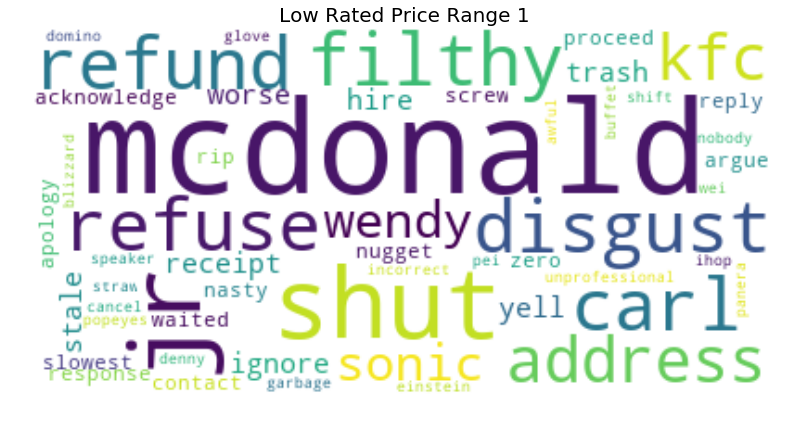

In [65]:
CreateWordCloud(uniqueLowtext_P1,"Low Rated Price Range 1")

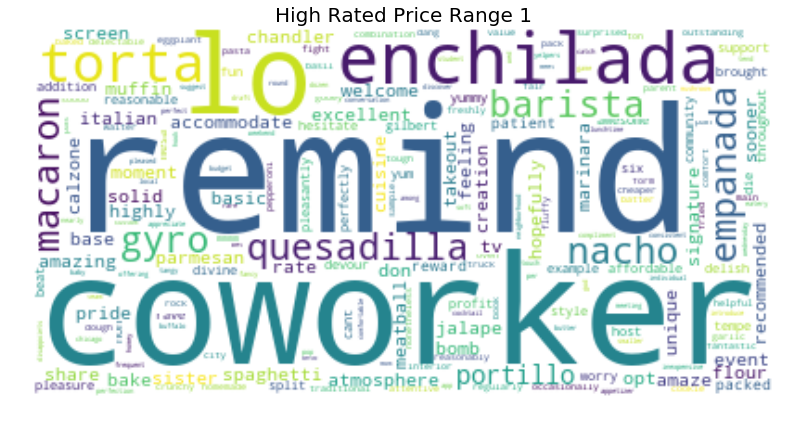

In [66]:
CreateWordCloud(uniqueHightext_P1,"High Rated Price Range 1")

In [67]:
#Here tried to get word cloud with high greater than 100, 200, 250 and 500. Notice that with 500 got the best word cloud.
#Similarly for low rated, wtried with 100, 50 and 75. 75 is giving a decent word cloud

wordcountDF_P2_Low_GT100 = wordcountDF_P2_Low[wordcountDF_P2_Low["wordcount"]>75]
wordcountDF_P2_high_GT100 = wordcountDF_P2_high[wordcountDF_P2_high["wordcount"]>500]
uniqueLowtext_P2,uniqueHightext_P2=createBOWforCloud(wordcountDF_P2_Low_GT100,wordcountDF_P2_high_GT100)

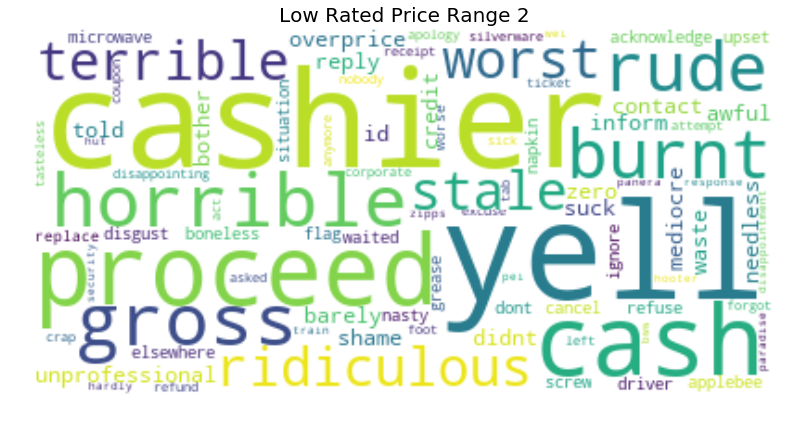

In [68]:
CreateWordCloud(uniqueLowtext_P2,"Low Rated Price Range 2")

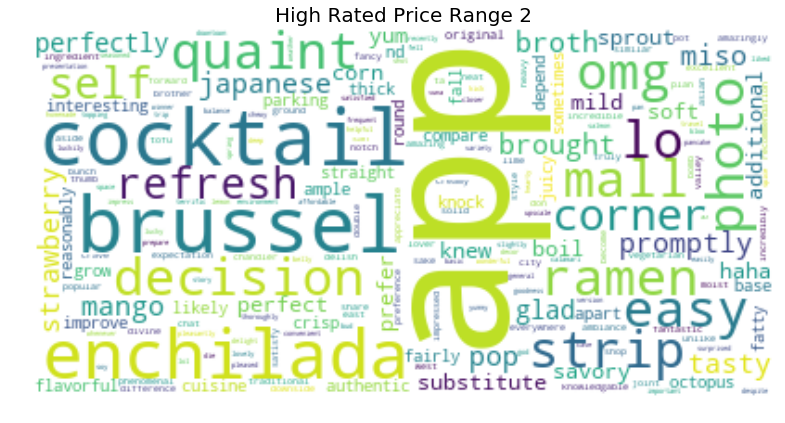

In [69]:
CreateWordCloud(uniqueHightext_P2,"High Rated Price Range 2")

In [70]:
wordcountDF_P3_Low_GT100 = wordcountDF_P3_Low[wordcountDF_P3_Low["wordcount"]>1]
wordcountDF_P3_high_GT100 = wordcountDF_P3_high[wordcountDF_P3_high["wordcount"]>12]
uniqueLowtext_P3,uniqueHightext_P3=createBOWforCloud(wordcountDF_P3_Low_GT100,wordcountDF_P3_high_GT100)

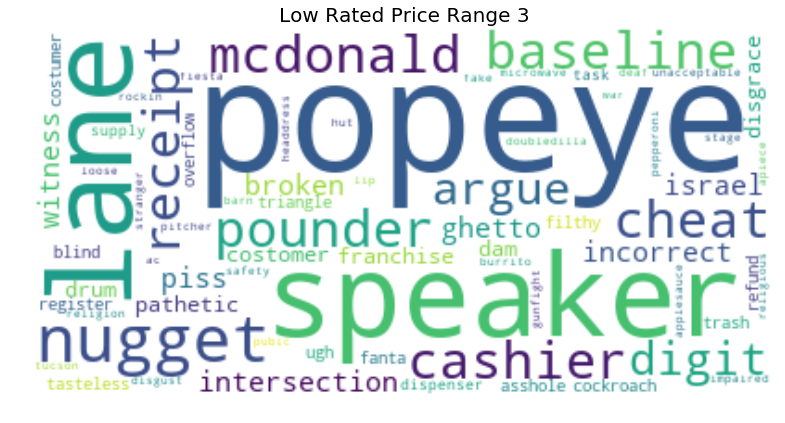

In [71]:
CreateWordCloud(uniqueLowtext_P3,"Low Rated Price Range 3")

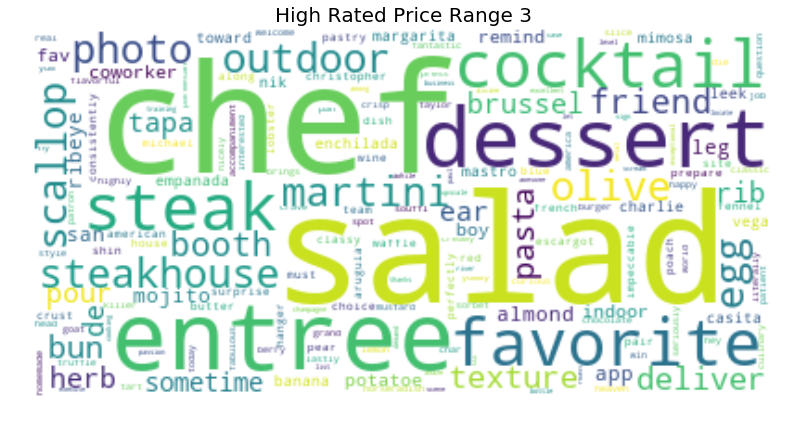

In [72]:
CreateWordCloud(uniqueHightext_P3,"High Rated Price Range 3")

In [73]:
wordcountDF_P4_Low_GT100 = wordcountDF_P4_Low[wordcountDF_P4_Low["wordcount"]>2]
wordcountDF_P4_high_GT100 = wordcountDF_P4_high[wordcountDF_P4_high["wordcount"]>12]
uniqueLowtext_P4,uniqueHightext_P4=createBOWforCloud(wordcountDF_P4_Low_GT100,wordcountDF_P4_high_GT100)

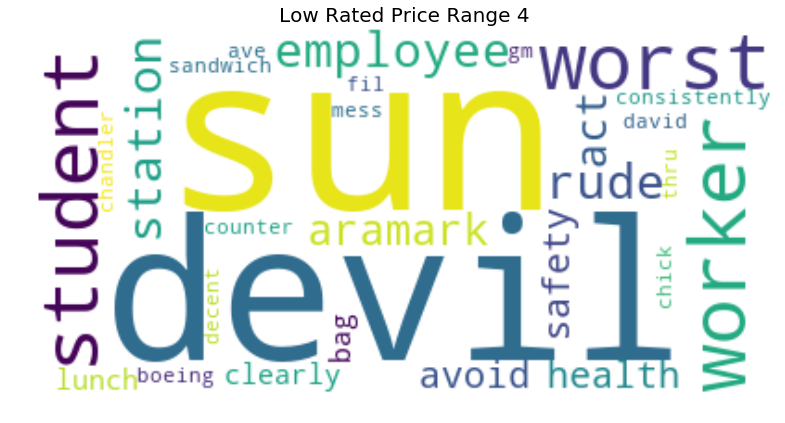

In [74]:
CreateWordCloud(uniqueLowtext_P4,"Low Rated Price Range 4")

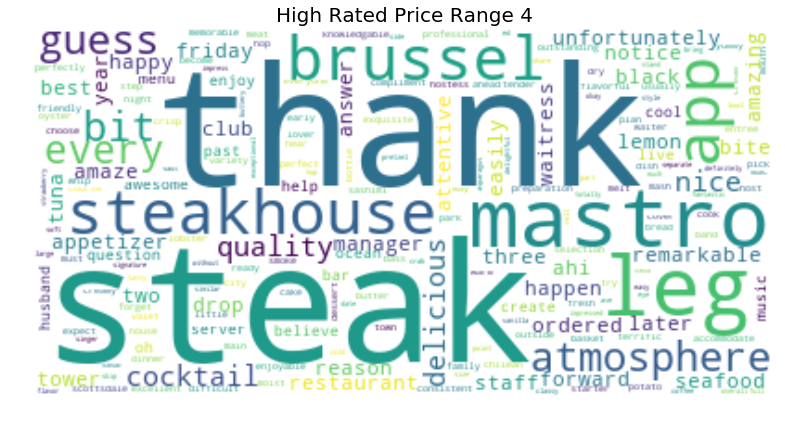

In [76]:
CreateWordCloud(uniqueHightext_P4,"High Rated Price Range 4")